# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aulia Aushaf Abidah
- **Email:** M012D4KX1833@bangkit.academy
- **ID Dicoding:** M012D4KX1833

## Menentukan Pertanyaan Bisnis


1.   Pada musim apa dan hari apa penyewaan sepeda paling tinggi di Washington D.C. berdasarkan data dua tahun terakhir?
2.   Apakah cuaca berpengaruh pada jumlah penyewaan sepeda di Washington D.C. pada jam jam tertentu?



## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
bike_day = pd.read_csv("/content/drive/MyDrive/Analisis_Data_DICODING/day.csv")
bike_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike_hour = pd.read_csv("/content/drive/MyDrive/Analisis_Data_DICODING/hour.csv")
bike_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
bike_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
bike_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
bike_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
bike_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terlihat bahwa tidak terdapat Missing Value pada kedua dataframe.

In [10]:
print("Jumlah duplikasi pada dataframe bike day : ", bike_day.duplicated().sum())
print("Jumlah duplikasi pada dataframe bike hour : ", bike_hour.duplicated().sum())

Jumlah duplikasi pada dataframe bike day :  0
Jumlah duplikasi pada dataframe bike hour :  0


Hal tersebut terlihat bahwa kedua dataset tidak ada yg mengalami duplikasi.

### Cleaning Data

In [11]:
column_mapping = {'dteday': 'date', 'yr': 'year', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
bike_day.rename(columns=column_mapping, inplace=True)
bike_day.head()

,instant,date,season,year,mnth,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
column_mapping = {'dteday': 'date', 'yr': 'year', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
bike_hour.rename(columns=column_mapping, inplace=True)
bike_hour.head()

,instant,date,season,year,mnth,hr,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
bike_df = bike_hour.merge(bike_day, on='date', how='inner', suffixes=('_hour', '_day'))
bike_df.head()

,instant_hour,date,season_hour,year_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temperature_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,total_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [19]:
weather_labels = {
    1: 'Jernih',
    2: 'Kabut',
    3: 'Curah Hujan Ringan',
    4: 'Curah Hujan Lebat'
}

bike_df['weather_label'] = bike_df['weathersit_day'].map(weather_labels)

In [20]:
bike_df.describe(include="all")

,instant_hour,date,season_hour,year_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temperature_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,total_day,weather_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jernih
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


In [23]:
bike_df.groupby('weather_label')['total_day'].mean().reset_index().sort_values("total_day")

,weather_label,total_day
0,Curah Hujan Ringan,1914.700855
2,Kabut,4062.717595
1,Jernih,4895.177083


In [25]:
bike_df.groupby('hr')['total_hour'].mean().reset_index()

,hr,total_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [26]:
bike_df.registered_hour.sum()

2672662

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa pola rata-rata jumlah persewaan sepeda per jam, dan bagaimana variasinya sepanjang hari?

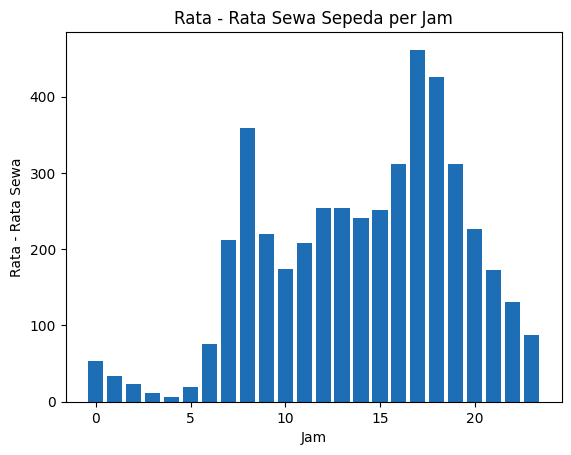

In [27]:
rental_hr = bike_df.groupby('hr')['total_hour'].mean()

plt.bar(rental_hr.index, rental_hr.values, color='#1E6EB6')

plt.title('Rata - Rata Sewa Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata - Rata Sewa')

plt.show()

Rata rata Sewa Sepeda paling banyak terjadi jam 17.00 dan 18.00 atau jam 5 PM dan 6 PM. Namun rata rata sewa sepeda paling sedikit terjadi jam 04.00 atau jam 4 AM.

### Pertanyaan 2: Bagaimana jumlah rata-rata persewaan sepeda terpengaruh oleh faktor cuaca?

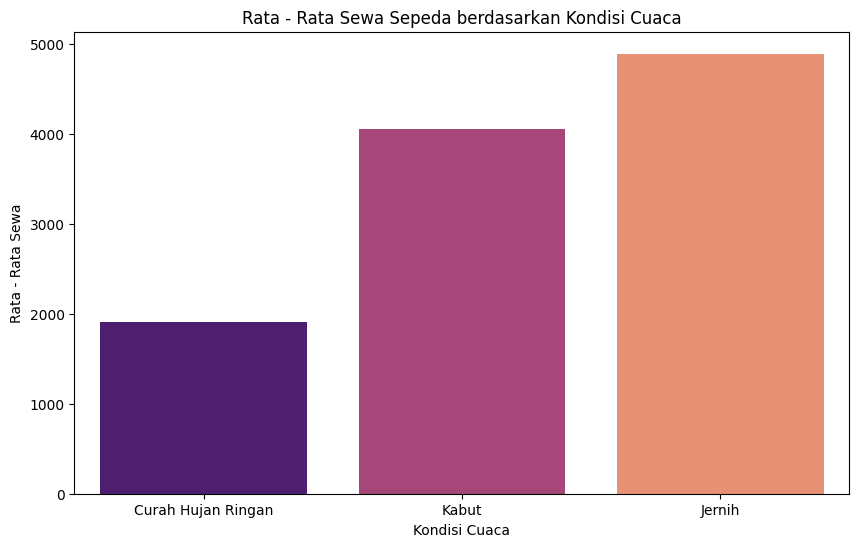

In [35]:
avg_weather = bike_df.groupby('weather_label')['total_day'].mean().reset_index().sort_values("total_day")

plt.figure(figsize=(10, 6))
sns.barplot(x='weather_label', y='total_day', data=avg_weather, hue='weather_label', palette='magma', legend=False)

plt.title('Rata - Rata Sewa Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata - Rata Sewa')

plt.show()

Rata rata sewa sepeda paling banyak terjadi pada kondisi cuaca jernih mencapai angka 4500 lebih. Namun rata rata sewa sepeda paling sedikit terjadi yakni saat kondisi cuaca hujan ringan hanya mencapai angka 2000 saja. Dari visualisasi data diatas terlihat bahwa kondisi cuaca sangat berpengaruh terhadap jumlah rata rata penyewaan sepeda.

## Conclusion




*   CONCLUSION PERTANYAAN 1


Dari visualisasi yang diberikan, dapat dilihat bahwa terdapat pola rata-rata jumlah persewaan sepeda per jam sepanjang hari. Rentang waktu tertinggi untuk persewaan sepeda terjadi pada pagi hari, dengan puncaknya sekitar jam 8 hingga 9 pagi. Setelah itu, jumlah persewaan menurun secara bertahap hingga siang hari. Pada sore hari, terjadi peningkatan kembali dalam jumlah persewaan, dengan puncaknya sekitar jam 17 hingga 18. Setelah itu, jumlah persewaan mulai menurun menjelang malam.

Variasi jumlah persewaan sepeda juga dapat diamati sepanjang hari. Variasi ini mencerminkan pola aktivitas masyarakat yang berubah-ubah seiring dengan perubahan jam dalam sehari. Persewaan sepeda cenderung meningkat saat orang berangkat kerja atau sekolah pada pagi hari, menurun saat siang hari ketika banyak orang berada di dalam ruangan, dan meningkat lagi pada sore hari ketika mereka kembali dari aktivitas mereka.

Dengan demikian, dapat disimpulkan bahwa pola persewaan sepeda per jam menunjukkan adanya hubungan yang signifikan dengan aktivitas harian masyarakat, dengan puncak persewaan terjadi pada jam-jam beraktivitas tinggi seperti pagi hari sebelum bekerja dan sore hari setelah bekerja.


*   CONCLUSION PERTANYAAN 2


Dari visualisasi yang diberikan, terlihat bahwa jumlah rata-rata persewaan sepeda dipengaruhi oleh kondisi cuaca. Kondisi cuaca yang lebih baik, seperti "Clear/Partly Cloudy" atau "Misty/Cloudy", cenderung memiliki jumlah rata-rata persewaan sepeda yang lebih tinggi dibandingkan dengan kondisi cuaca yang buruk, seperti "Light Snow/Rain" atau "Severe Weather".

Hal ini menunjukkan bahwa cuaca memainkan peran penting dalam keputusan orang untuk menyewa sepeda. Ketika cuaca bersih atau sedikit berawan, orang lebih cenderung untuk keluar dan beraktivitas di luar ruangan, termasuk bersepeda. Sebaliknya, saat cuaca buruk seperti hujan atau salju, minat untuk menyewa sepeda cenderung menurun karena kondisi tersebut kurang nyaman untuk bersepeda.

Dengan demikian, dapat disimpulkan bahwa faktor cuaca memiliki pengaruh yang signifikan terhadap jumlah rata-rata persewaan sepeda, dengan jumlah persewaan cenderung lebih tinggi pada kondisi cuaca yang baik dan lebih rendah pada kondisi cuaca yang buruk.

